In [1]:
import pandas as pd
import numpy as np

df_raw=pd.read_csv("/workspaces/pds-2022-turquoise-team/00_source_data/washington_all_data_all_counties_final_fr.csv")
from plotnine import *
df_raw.head()

,Unnamed: 0,Deaths,State,County,Year,Population,_merge,Death Rate,Years since policy,Policy or Control
0,4700,23.0,Alaska,"Aleutians East Borough, AK",2005,2787,both,825.260136,NaN,Control
1,4702,47.0,Alaska,"Aleutians East Borough, AK",2005,2787,both,1686.401148,NaN,Control
2,4703,35.0,Alaska,"Aleutians East Borough, AK",2007,3012,both,1162.018592,NaN,Control
3,4704,17.0,Alaska,"Aleutians East Borough, AK",2016,3296,both,515.776699,NaN,Control
4,4705,17.0,Alaska,"Aleutians East Borough, AK",2020,3401,both,499.852984,NaN,Control


In [2]:
we_want_washington = ['Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
washington=['Washington']
df_washington_control = df_raw[df_raw['State'].isin(we_want_washington)]
df_washington_treatment= df_raw[df_raw['State'].isin(washington)]


df_washington_treatment.head()

,Unnamed: 0,Deaths,State,County,Year,Population,_merge,Death Rate,Years since policy,Policy or Control
17348,82707,5.0,Washington,"Adams County, WA",1999,16239,right_only,30.790073,NaN,Policy
17349,82708,5.0,Washington,"Adams County, WA",2000,16428,right_only,30.435841,NaN,Policy
17350,82709,5.0,Washington,"Adams County, WA",2001,16259,right_only,30.752199,NaN,Policy
17351,82710,5.0,Washington,"Adams County, WA",2002,16445,right_only,30.404378,NaN,Policy
17352,82711,5.0,Washington,"Adams County, WA",2003,16612,right_only,30.098724,NaN,Policy


In [3]:
df_washington_control_pre=df_washington_control.loc[df_washington_control["Year"]<2012]
df_washington_control_post=df_washington_control.loc[df_washington_control["Year"]>=2012]


df_washington_treatment_pre=df_washington_treatment.loc[df_washington_treatment["Year"]<2012]
df_washington_treatment_post=df_washington_treatment.loc[df_washington_treatment["Year"]>=2012]

/Users/alisa/opt/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


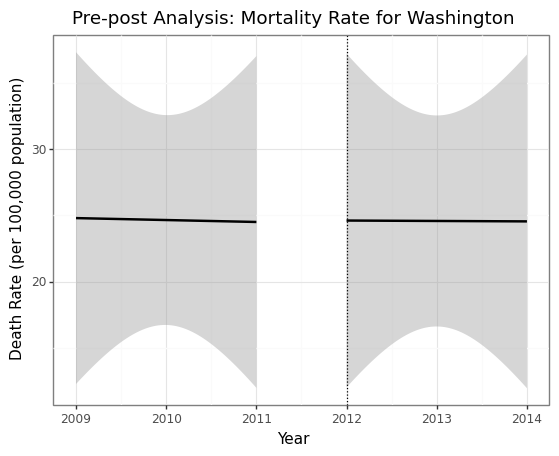

<ggplot: (674906965)>

In [4]:
(ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            df_washington_treatment_pre,
            aes("Year", "Death Rate"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            df_washington_treatment_post,
            aes("Year", "Death Rate"),
            method="lm",
        )
        + geom_vline(xintercept=2012, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])+labs(
        title="Pre-post Analysis: Mortality Rate for Washington"
    )+ylab("Death Rate (per 100,000 population)")+theme_bw()
)